In [2]:
import porespy as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *

## Random Sphere Pack : Method I

In [2]:
porosity = 0.75
dx, dy, dz = 200, 200, 100
rmin, rmax = 5, 20
min_throat = 1
sphere_coords = generate_rand_spherepack_I(porosity, dx, dy, dz, rmin, rmax, min_throat, overlapping=False)

Loop #00500, n_spheres=00177, poro=0.799
Loop #01000, n_spheres=00267, poro=0.788
Loop #01500, n_spheres=00330, poro=0.780
Loop #02000, n_spheres=00378, poro=0.777
Loop #02500, n_spheres=00418, poro=0.774
Loop #03000, n_spheres=00453, poro=0.771
Loop #03500, n_spheres=00472, poro=0.770
Loop #04000, n_spheres=00490, poro=0.769
Loop #04500, n_spheres=00515, poro=0.768
Loop #05000, n_spheres=00539, poro=0.766
Loop #05500, n_spheres=00556, poro=0.766
Loop #06000, n_spheres=00568, poro=0.765
Loop #06500, n_spheres=00580, poro=0.765
Loop #07000, n_spheres=00596, poro=0.764
Loop #07500, n_spheres=00610, poro=0.764
Loop #08000, n_spheres=00619, poro=0.764
Loop #08500, n_spheres=00627, poro=0.763
Loop #09000, n_spheres=00641, poro=0.763
Loop #09500, n_spheres=00648, poro=0.762
Loop #10000, n_spheres=00659, poro=0.762


In [3]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

             X          Y         Z     R
0    129.76166  131.27020  33.01435  19.0
1     79.53775   57.98577  52.79687  20.0
2    133.33980   80.10035  75.87153  20.0
3     60.93605   57.85432  76.50247   9.0
4    118.47241  101.12710  54.30681  12.0
..         ...        ...       ...   ...
654   20.54603   43.62919  79.53637   3.0
655  143.87900  106.04888  22.24703   4.0
656  121.89695   55.43934  49.78235   3.0
657  140.50221   40.34826  21.19705   3.0
658  101.46681   66.27767  77.77362   3.0

[659 rows x 4 columns]


136.66061193692633

In [4]:
im = ps.generators.spheres_from_coords(df)

In [5]:
im.shape

(187, 190, 95)

In [6]:
1-np.count_nonzero(im)/im.size

0.7183358762794969

In [7]:
np.save('rand_sphere_pack',im)

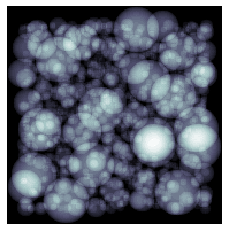

In [8]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

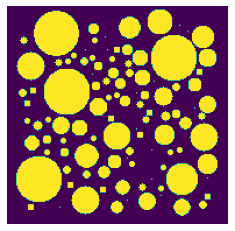

In [9]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,im.shape[2]//2])
ax.axis(False);

## Random Sphere Pack : Method II

In [48]:
num_spheres = 500
dx, dy, dz = 200, 200, 200
rmin, rmax = 9, 10
min_throat = 0.5
sphere_coords = generate_rand_spherepack_II(num_spheres, dx, dy, dz, rmin, rmax, min_throat, overlapping=False)

Loop #00500, n_spheres=00234, poro=0.881
Loop #01000, n_spheres=00311, poro=0.844
Loop #01500, n_spheres=00359, poro=0.821
Loop #02000, n_spheres=00384, poro=0.810
Loop #02500, n_spheres=00410, poro=0.798
Loop #03000, n_spheres=00426, poro=0.790
Loop #03500, n_spheres=00435, poro=0.786
Loop #04000, n_spheres=00445, poro=0.782
Loop #04500, n_spheres=00452, poro=0.779
Loop #05000, n_spheres=00463, poro=0.774
Loop #05500, n_spheres=00470, poro=0.771
Loop #06000, n_spheres=00477, poro=0.767
Loop #06500, n_spheres=00487, poro=0.762
Loop #07000, n_spheres=00488, poro=0.762
Loop #07500, n_spheres=00495, poro=0.759
Loop #08000, n_spheres=00496, poro=0.758
Loop #08500, n_spheres=00498, poro=0.758
Loop #08669, n_spheres=00501, poro=0.756


In [49]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

             X          Y          Z     R
0     49.03926   69.72897  128.50603   9.0
1     14.45698   27.89029   94.16587  10.0
2     69.17589  139.05196   13.43840  10.0
3    122.42760  160.04128   32.17865  10.0
4    124.77568  120.43098   87.96634  10.0
..         ...        ...        ...   ...
496   25.54568   10.51245   94.89776   9.0
497  159.15092   67.49095   10.13634   9.0
498   39.87931  137.76000   11.14023  10.0
499  189.94406   79.52007  144.02232  10.0
500   16.77779   11.72419   12.73367  10.0

[501 rows x 4 columns]


188.91984712179357

In [50]:
im = ps.generators.spheres_from_coords(df)

In [51]:
im.shape

(201, 201, 201)

In [52]:
1-np.count_nonzero(im)/im.size

0.7603715537803175

In [53]:
np.save('rand_sphere_pack_II',im)

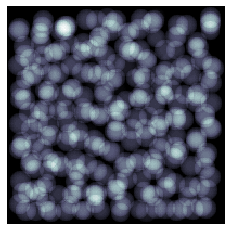

In [54]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

In [13]:
dz-r

190

In [52]:
num_spheres = 800
dx, dy, dz = 200, 200, 200
rmin, rmax = 9, 10
min_throat = 0.5
Rs = [15, 10, 5]
loop_limits = 2000
overlapping = False
# Counters for spheres and number of loops
sphere_counter = 1
loop_counter = 0
# define empty list
sphere_coords = []
# create one random sphere and add it to the list
r = np.random.choice(Rs)
x = np.round(np.random.uniform(0+r,dx-r), decimals=5)
y = np.round(np.random.uniform(0+r,dy-r), decimals=5)
z = np.round(np.random.uniform(0+r,dz-r), decimals=5)
sphere_coords.append([x,y,z,r])
rmin, rmax = np.min(Rs), np.max(Rs)
# Start a loop to generate spheres
while sphere_counter<=num_spheres:
    # Breaks the loop
    if loop_counter==loop_limits:
        break
    loop_counter += 1
    # print current condition every 500 loops
    if loop_counter%500==0:
        print(f"Loop #{loop_counter:0>5}, n_spheres={sphere_counter:0>5}, poro={calc_porosity(sphere_coords, dx*dy*dz):.3f}")
    # create random location
    x = np.round(np.random.uniform(0+rmax,dx-rmax), decimals=5)
    y = np.round(np.random.uniform(0+rmax,dy-rmax), decimals=5)
    # z = np.round(np.random.uniform(0+rmax,dz-rmax), decimals=5)
    r = np.random.choice(Rs)
    z = dz-r
    if overlapping==False:
        for k in np.arange(z, 0, -z//100): # loop until still in bounding box, breaks if doesn't overlap
            # Duplicates generated sphere
            temp = np.tile([x,y,k,r], len(sphere_coords)).reshape([len(sphere_coords), 4])
            minths = np.tile(min_throat, len(sphere_coords)).reshape([len(sphere_coords), 1])
            # Compares generated sphere with all previously generated spheres to determine any overlapping
            overlapped = list(map(is_overlapping, sphere_coords, temp, minths)) # inputs ([100,4] , [100,4], min_throat)
            # If there is no overlapping, add to the list
            if all(not x for x in overlapped):
                sphere_coords.append([x,y,k,r])
                sphere_counter+=1
                break

    # If overlapping is True/allowed then it just creates a random sphere and adds it to the list.
    elif overlapping==True:
          r = np.random.randint(rmin, rmax)
          sphere_coords.append([x,y,z,r])
          sphere_counter+=1
print(f"Loop #{loop_counter:0>5}, n_spheres={sphere_counter:0>5}, poro={calc_porosity(sphere_coords, dx*dy*dz):.3f}")
sphere_coords =  np.array(sphere_coords)

Loop #00500, n_spheres=00395, poro=0.736
Loop #01000, n_spheres=00588, poro=0.695
Loop #01500, n_spheres=00728, poro=0.679
Loop #01806, n_spheres=00801, poro=0.673


In [45]:
df = pd.DataFrame(np.copy(sphere_coords), columns=['X', 'Y', 'Z', 'R'])
print(df)
(df['X'].max()*df['Y'].max()*df['Z'].max())**0.333

             X          Y          Z     R
0    114.06338   32.20506  135.28086   5.0
1     31.95216   70.02848  195.00000   5.0
2     61.30085   27.03642  190.00000  10.0
3     39.73414   28.50676  175.00000  15.0
4    143.65397  171.66543  185.00000  15.0
..         ...        ...        ...   ...
496  130.00407   97.80396    6.00000  10.0
497  157.44828   27.92532   58.00000  10.0
498   68.61319  143.80949  195.00000   5.0
499  118.96452  183.99813   94.00000  10.0
500   60.45887   82.54619  137.00000   5.0

[501 rows x 4 columns]


187.01132632024016

In [46]:
im = ps.generators.spheres_from_coords(df)

In [47]:
im.shape

(200, 201, 211)

In [48]:
1-np.count_nonzero(im)/im.size

0.7274341562330527

In [49]:
np.save('rand_sphere_pack',im)

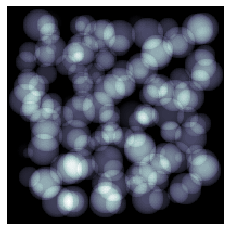

In [50]:
fig, ax = plt.subplots()
ax.imshow(ps.visualization.xray(~im[..., :100], axis=2), interpolation='none', origin='lower', cmap=plt.cm.bone)
ax.axis(False);

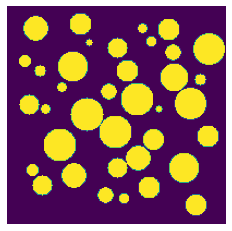

In [51]:
fig, ax = plt.subplots()
ax.imshow(im[:,:,im.shape[2]//2])
ax.axis(False);